# Features

## Use `dataloader` to get an utterance

In [1]:
from dataloader import get_dataloader
import torch
import numpy as np

# CTC model for ASR

## Obtain phoneme output units

In [2]:
# First find the unique phones in train.json, and then
# create a file named vocab.txt, each line in this 
# file is a unique phone, in total there should be 
# 40 lines

vocab = {}
phonemes = []
with open("vocab_39.txt") as f:
    for id, text in enumerate(f):
        vocab[text.strip()] = id
        phonemes.append(text)
phonemes = phonemes[1:]

## Model & training configurations

In [3]:
# from collections import namedtuple
# if torch.cuda.is_available():
#     device = "cuda:0"
# else:
#     device = "cpu"

# args = {'seed': 123,
#         'train_json': 'train_fbank.json',
#         'val_json': 'dev_fbank.json',
#         'test_json': 'test_fbank.json',
#         'batch_size': 4,
#         'num_layers': 1,
#         'fbank_dims': 23,
#         'model_dims': 128,
#         'concat': 1,
#         'lr': 0.5,
#         'vocab': vocab,
#         'report_interval': 50,
#         'num_epochs': 20,
#         'device': device,
#        }

# args = namedtuple('x', args)(**args)

In [4]:
# import models
# model = models.BiLSTM(
#     args.num_layers, args.fbank_dims * args.concat, args.model_dims, len(args.vocab))
# num_params = sum(p.numel() for p in model.parameters())
# print('Total number of model parameters is {}'.format(num_params))

## Training

In [5]:
# from datetime import datetime
# from trainer import train
# start = datetime.now()
# model.to(args.device)
# model_path = train(model, args)
# end = datetime.now()
# duration = (end - start).total_seconds()
# print('Training finished in {} minutes.'.format(divmod(duration, 60)[0]))
# print('Model saved to {}'.format(model_path))

## Decoding

In [6]:
### You can uncomment the following line and change model path to the model you want to decode
# model_path="checkpoints/20221110_120418/model_16"

In [7]:
# import torch
# print('Loading model from {}'.format(model_path))
# model.load_state_dict(torch.load(model_path, map_location=device))
# model.eval()

In [8]:
# from decoder import decode
# results = decode(model, args, args.test_json)
# print("SUB: {:.2f}%, DEL: {:.2f}%, INS: {:.2f}%, COR: {:.2f}%, PER: {:.2f}%".format(*results))

## Plotting

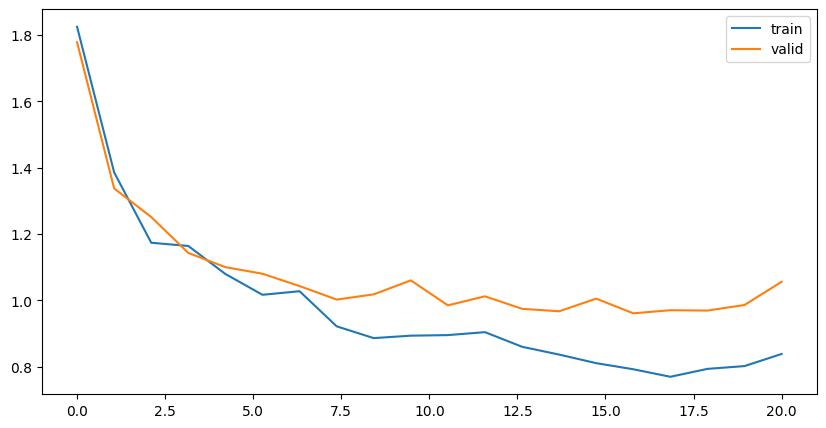

In [14]:

import matplotlib.pyplot as plt

# init
plt.figure(figsize=(10,5))

train_loss = [
    1.82474,
1.38592,
1.17388,
1.16418,
1.07972,
1.01704,
1.02782,
0.92208,
0.88646,
0.89385,
0.89556,
0.90447,
0.86040,
0.83687,
0.81099,
0.79263,
0.76997,
0.79377,
0.80220,
0.83875,
]
    
valid_loss =    [
        1.77826,
1.33755,
1.25135,
1.14313,
1.10031,
1.08053,
1.04334,
1.00266,
1.01832,
1.06050,
0.98522,
1.01243,
0.97481,
0.96733,
1.00541,
0.96122,
0.97055,
0.96949,
0.98636,
1.05625,
    ]

xs = np.linspace(0,20,20)
plt.plot(xs,train_loss, label='train')
plt.plot(xs,valid_loss, label='valid')

plt.legend()
plt.show()

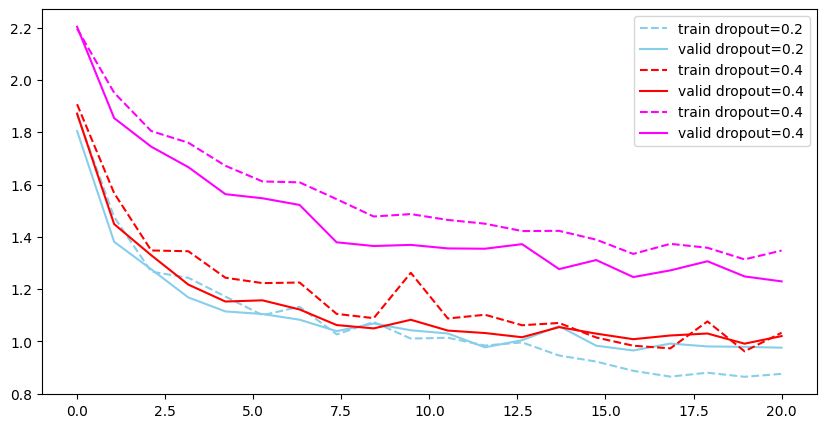

In [24]:
# q3.1.1 - reg - dropout
train_loss_20 = [
    1.86805,
1.47527,
1.26675,
1.24319,
1.17146,
1.10004,
1.13229,
1.02676,
1.07397,
1.01060,
1.01382,
0.98401,
0.99593,
0.94578,
0.92273,
0.88728,
0.86514,
0.88004,
0.86452,
0.87569,
]

valid_loss_20 = [
    1.80462,
1.38076,
1.27571,
1.16804,
1.11448,
1.10466,
1.08286,
1.03901,
1.06836,
1.04229,
1.03012,
0.97719,
1.00453,
1.05816,
0.98343,
0.96508,
0.99153,
0.98056,
0.97907,
0.97579,
]

valid_loss_40 = [
    1.87132,
1.44844,
1.32950,
1.21715,
1.15236,
1.15691,
1.12203,
1.06235,
1.04955,
1.08263,
1.04120,
1.03185,
1.01577,
1.05450,
1.02959,
1.00825,
1.02248,
1.03002,
0.99114,
1.02020,
]

train_loss_40 = [
    1.90710,
1.56695,
1.34766,
1.34472,
1.24340,
1.22281,
1.22502,
1.10505,
1.08880,
1.26224,
1.08744,
1.10180,
1.06166,
1.07035,
1.01475,
0.98333,
0.97323,
1.07628,
0.96197,
1.03284,
]

train_loss_30 = [
    
]
valid_loss_30 = [
    
]
train_loss_80 = [
    2.19590,
1.95108,
1.80447,
1.75987,
1.67162,
1.61176,
1.60819,
1.54393,
1.47756,
1.48682,
1.46443,
1.45013,
1.42194,
1.42271,
1.38896,
1.33448,
1.37300,
1.35801,
1.31358,
1.34733,
]

valid_loss_80 = [
    2.20331,
1.85385,
1.74465,
1.66643,
1.56301,
1.54731,
1.52184,
1.37887,
1.36469,
1.36899,
1.35550,
1.35432,
1.37186,
1.27634,
1.31106,
1.24594,
1.27151,
1.30640,
1.24841,
1.22941,
]


plt.figure(figsize=(10,5))
xs = np.linspace(0,20,20)
plt.plot(xs,train_loss_20, label='train dropout=0.2', c='skyblue', linestyle='--')
plt.plot(xs,valid_loss_20, label='valid dropout=0.2', c='skyblue')
plt.plot(xs,train_loss_40, label='train dropout=0.4', c='r', linestyle='--')
plt.plot(xs,valid_loss_40, label='valid dropout=0.4', c='r')

# plt.plot(xs,train_loss_30, label='train dropout=0.3', c='g', linestyle='--')
# plt.plot(xs,valid_loss_30, label='valid dropout=0.3', c='g')

plt.plot(xs,train_loss_80, label='train dropout=0.4', c='magenta', linestyle='--')
plt.plot(xs,valid_loss_80, label='valid dropout=0.4', c='magenta')

plt.legend()
plt.show()

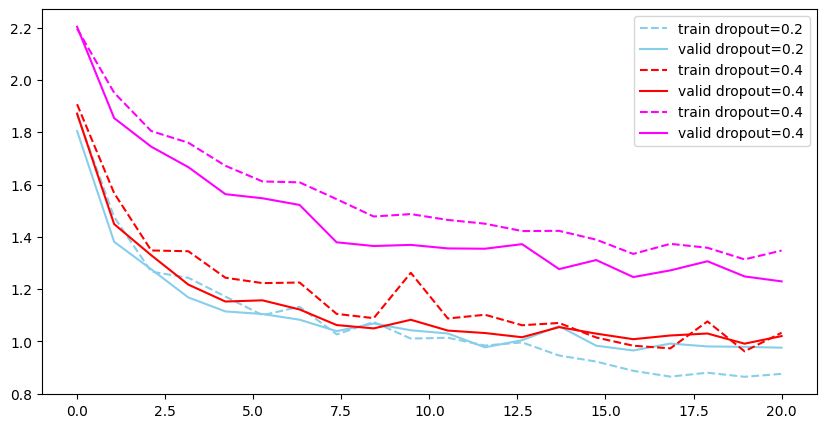

In [24]:
# q3.1.1 - reg - clip
train_loss_20 = [
    1.86805,
1.47527,
1.26675,
1.24319,
1.17146,
1.10004,
1.13229,
1.02676,
1.07397,
1.01060,
1.01382,
0.98401,
0.99593,
0.94578,
0.92273,
0.88728,
0.86514,
0.88004,
0.86452,
0.87569,
]

valid_loss_20 = [
    1.80462,
1.38076,
1.27571,
1.16804,
1.11448,
1.10466,
1.08286,
1.03901,
1.06836,
1.04229,
1.03012,
0.97719,
1.00453,
1.05816,
0.98343,
0.96508,
0.99153,
0.98056,
0.97907,
0.97579,
]

valid_loss_40 = [
    1.87132,
1.44844,
1.32950,
1.21715,
1.15236,
1.15691,
1.12203,
1.06235,
1.04955,
1.08263,
1.04120,
1.03185,
1.01577,
1.05450,
1.02959,
1.00825,
1.02248,
1.03002,
0.99114,
1.02020,
]

train_loss_40 = [
    1.90710,
1.56695,
1.34766,
1.34472,
1.24340,
1.22281,
1.22502,
1.10505,
1.08880,
1.26224,
1.08744,
1.10180,
1.06166,
1.07035,
1.01475,
0.98333,
0.97323,
1.07628,
0.96197,
1.03284,
]

train_loss_30 = [
    
]
valid_loss_30 = [
    
]
train_loss_80 = [
    2.19590,
1.95108,
1.80447,
1.75987,
1.67162,
1.61176,
1.60819,
1.54393,
1.47756,
1.48682,
1.46443,
1.45013,
1.42194,
1.42271,
1.38896,
1.33448,
1.37300,
1.35801,
1.31358,
1.34733,
]

valid_loss_80 = [
    2.20331,
1.85385,
1.74465,
1.66643,
1.56301,
1.54731,
1.52184,
1.37887,
1.36469,
1.36899,
1.35550,
1.35432,
1.37186,
1.27634,
1.31106,
1.24594,
1.27151,
1.30640,
1.24841,
1.22941,
]


plt.figure(figsize=(10,5))
xs = np.linspace(0,20,20)
plt.plot(xs,train_loss_20, label='train dropout=0.2', c='skyblue', linestyle='--')
plt.plot(xs,valid_loss_20, label='valid dropout=0.2', c='skyblue')
plt.plot(xs,train_loss_40, label='train dropout=0.4', c='r', linestyle='--')
plt.plot(xs,valid_loss_40, label='valid dropout=0.4', c='r')

# plt.plot(xs,train_loss_30, label='train dropout=0.3', c='g', linestyle='--')
# plt.plot(xs,valid_loss_30, label='valid dropout=0.3', c='g')

plt.plot(xs,train_loss_80, label='train dropout=0.4', c='magenta', linestyle='--')
plt.plot(xs,valid_loss_80, label='valid dropout=0.4', c='magenta')

plt.legend()
plt.show()

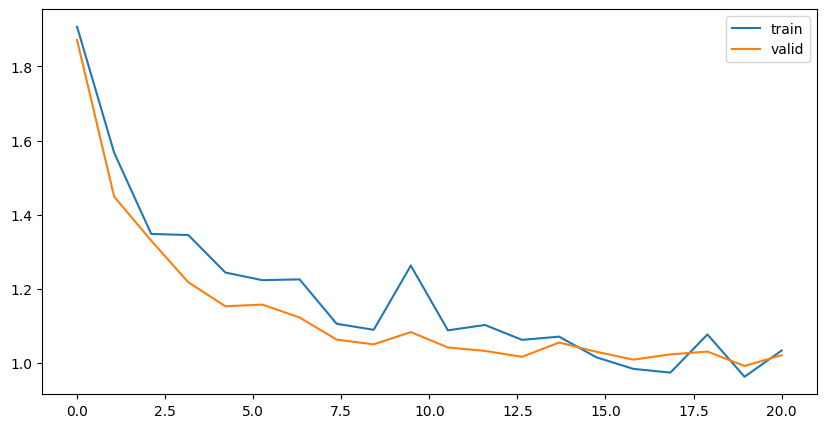

In [19]:
# q3.1.2 - optimiser
sgd = [
    1.86805,
1.47527,
1.26675,
1.24319,
1.17146,
1.10004,
1.13229,
1.02676,
1.07397,
1.01060,
1.01382,
0.98401,
0.99593,
0.94578,
0.92273,
0.88728,
0.86514,
0.88004,
0.86452,
0.87569,
]

adam = [
    1.80462,
1.38076,
1.27571,
1.16804,
1.11448,
1.10466,
1.08286,
1.03901,
1.06836,
1.04229,
1.03012,
0.97719,
1.00453,
1.05816,
0.98343,
0.96508,
0.99153,
0.98056,
0.97907,
0.97579,
]

plt.figure(figsize=(10,5))
xs = np.linspace(0,20,20)
plt.plot(xs,sgd_train, label='train optimiser=sgd', c='skyblue', linestyle='--')
plt.plot(xs,sgd_valid, label='valid optimiser=sgd', c='skyblue')
plt.plot(xs,adam_train, label='train optimiser=adam', c='r', linestyle='--')
plt.plot(xs,adam_valid, label='valid optimiser=adam', c='r')

# plt.plot(xs,train_loss_30, label='train dropout=0.3', c='g', linestyle='--')
# plt.plot(xs,valid_loss_30, label='valid dropout=0.3', c='g')

plt.plot(xs,train_loss_80, label='train dropout=0.4', c='magenta', linestyle='--')
plt.plot(xs,valid_loss_80, label='valid dropout=0.4', c='magenta')

plt.legend()
plt.show()

In [ ]:
# q3.1.2 - complexity
train_loss_20 = [
    1.86805,
1.47527,
1.26675,
1.24319,
1.17146,
1.10004,
1.13229,
1.02676,
1.07397,
1.01060,
1.01382,
0.98401,
0.99593,
0.94578,
0.92273,
0.88728,
0.86514,
0.88004,
0.86452,
0.87569,
]

valid_loss_20 = [
    1.80462,
1.38076,
1.27571,
1.16804,
1.11448,
1.10466,
1.08286,
1.03901,
1.06836,
1.04229,
1.03012,
0.97719,
1.00453,
1.05816,
0.98343,
0.96508,
0.99153,
0.98056,
0.97907,
0.97579,
]

valid_loss_40 = [
    1.87132,
1.44844,
1.32950,
1.21715,
1.15236,
1.15691,
1.12203,
1.06235,
1.04955,
1.08263,
1.04120,
1.03185,
1.01577,
1.05450,
1.02959,
1.00825,
1.02248,
1.03002,
0.99114,
1.02020,
]

train_loss_40 = [
    1.90710,
1.56695,
1.34766,
1.34472,
1.24340,
1.22281,
1.22502,
1.10505,
1.08880,
1.26224,
1.08744,
1.10180,
1.06166,
1.07035,
1.01475,
0.98333,
0.97323,
1.07628,
0.96197,
1.03284,
]

train_loss_30 = [
    
]
valid_loss_30 = [
    
]
train_loss_80 = [
    2.19590,
1.95108,
1.80447,
1.75987,
1.67162,
1.61176,
1.60819,
1.54393,
1.47756,
1.48682,
1.46443,
1.45013,
1.42194,
1.42271,
1.38896,
1.33448,
1.37300,
1.35801,
1.31358,
1.34733,
]

valid_loss_80 = [
    2.20331,
1.85385,
1.74465,
1.66643,
1.56301,
1.54731,
1.52184,
1.37887,
1.36469,
1.36899,
1.35550,
1.35432,
1.37186,
1.27634,
1.31106,
1.24594,
1.27151,
1.30640,
1.24841,
1.22941,
]


plt.figure(figsize=(10,5))
xs = np.linspace(0,20,20)
plt.plot(xs,train_loss_20, label='train dropout=0.2', c='skyblue', linestyle='--')
plt.plot(xs,valid_loss_20, label='valid dropout=0.2', c='skyblue')
plt.plot(xs,train_loss_40, label='train dropout=0.4', c='r', linestyle='--')
plt.plot(xs,valid_loss_40, label='valid dropout=0.4', c='r')

# plt.plot(xs,train_loss_30, label='train dropout=0.3', c='g', linestyle='--')
# plt.plot(xs,valid_loss_30, label='valid dropout=0.3', c='g')

plt.plot(xs,train_loss_80, label='train dropout=0.4', c='magenta', linestyle='--')
plt.plot(xs,valid_loss_80, label='valid dropout=0.4', c='magenta')

plt.legend()
plt.show()

In [26]:
import Levenshtein

def ctc_backtrace_with_editops(predicted_labels, ground_truth_labels, blank_symbol='-'):
    """
    Perform back tracing for CTC alignment using Levenshtein edit operations.

    Args:
    - predicted_labels (list): List of predicted labels.
    - ground_truth_labels (list): List of ground truth labels.
    - blank_symbol (str): CTC blank symbol.

    Returns:
    - aligned_labels (list): Aligned labels after back tracing.
    """

    # Combine predicted and ground truth labels into strings
    predicted_str = ''.join(predicted_labels)
    ground_truth_str = ''.join(ground_truth_labels)

    # Compute Levenshtein edit operations
    edit_ops = Levenshtein.editops(predicted_str, ground_truth_str)
    print(edit_ops)

    # Perform back tracing to align the sequences
    aligned_labels = []
    for op, pos1, pos2 in edit_ops:
        if op == 'replace' or op == 'insert':
            aligned_labels.append(predicted_labels[pos1])
        if op == 'replace' or op == 'delete':
            aligned_labels.append(blank_symbol)

    return aligned_labels

# Example usage:
predicted_sequence = ['A', 'A', '-', 'B', 'C', 'C', 'D', '-']
ground_truth_sequence = ['A', 'B', 'C', 'D']
aligned_sequence = ctc_backtrace_with_editops(predicted_sequence, ground_truth_sequence)
print("Predicted Sequence:", predicted_sequence)
print("Ground Truth Sequence:", ground_truth_sequence)
print("Aligned Sequence:", aligned_sequence)


[('delete', 1, 1), ('delete', 2, 1), ('delete', 5, 3), ('delete', 7, 4)]
Predicted Sequence: ['A', 'A', '-', 'B', 'C', 'C', 'D', '-']
Ground Truth Sequence: ['A', 'B', 'C', 'D']
Aligned Sequence: ['-', '-', '-', '-']
